In [176]:
from sympy import *
import sympy
import numpy as np
import matplotlib.pyplot as plt
import time 
import shapely
from shapely.geometry import LineString, Point
x = Symbol('x')
y = Symbol('y')
z = Symbol('z')
w = Symbol('w')
u = Symbol('u')
q = Symbol('q')
e = Symbol('e')
variables=(x,y,z,w,u,q,e)
f = x**2 + x*y**2 + x*z**2*w + u*q**2*w*e**2

f2 = (f*f)

F = integrate(f, x) 
G = integrate(f, y)

In [177]:
def variable_change(ODE,dependent_var, 
                    independent_var,
                    new_dependent_var = None, 
                    new_independent_var= None, 


                    dependent_var_relation = None,
                    independent_var_relation = None,
                    order = 2):





    if new_dependent_var == None:
        new_dependent_var = dependent_var
    if new_independent_var == None:
        new_independent_var = independent_var




    # dependent variable change

    if new_independent_var != independent_var:

        for i in range(order, -1, -1):

            # remplace derivate
            a = D(dependent_var , independent_var, i )
            ξ = Function("ξ")(independent_var)

            b = D( dependent_var.subs(independent_var, ξ),  independent_var  ,i)

            rel = solve(independent_var_relation, new_independent_var)[0]


            for j in range(order, 0, -1):
                b = b.subs( D(ξ,independent_var,j), D(rel,independent_var,j))

            b = b.subs(ξ, new_independent_var)

            rel = solve(independent_var_relation, independent_var)[0]
            b = b.subs(independent_var, rel)


            ODE =   ODE.subs(a,b)

        ODE = ODE.subs(independent_var, rel)
    return ODE

    # change of variables of indpendent variable

In [178]:
from sympy import *
from sympy import diff as D

E, ℏ ,w,m,x,u = symbols("E, ℏ , w,m,x,u")
Ψ ,H = map(Function, ["Ψ ","H"])
Ψ ,H = Ψ(x), H(u)



DiffEq = Eq(-ℏ*ℏ*D(Ψ,x,2)/(2*m) + m*w*w*(x*x)*Ψ/2 - E*Ψ,0)
display(DiffEq)



display(Eq(u , x*sqrt(m*w/ℏ)))
display(Eq(Ψ, H*exp(-u*u/2)))


newODE = variable_change(ODE = DiffEq,


                independent_var = x, 
                new_independent_var= u,
                independent_var_relation = Eq(u , x*sqrt(m*w/ℏ)),
                dependent_var = Ψ,  


                new_dependent_var = H,   
                dependent_var_relation = Eq(Ψ, H*exp(-u*u/2)),

                order = 2)
display(newODE)

Eq(-E*Ψ (x) + m*w**2*x**2*Ψ (x)/2 - ℏ**2*Derivative(Ψ (x), (x, 2))/(2*m), 0)

Eq(u, x*sqrt(m*w/ℏ))

Eq(Ψ (x), H(u)*exp(-u**2/2))

Eq(-E*Ψ (u) + u**2*w*ℏ*Ψ (u)/2 - w*ℏ*Derivative(Ψ (u), (u, 2))/2, 0)

In [179]:
f

e**2*q**2*u*w + w*x*z**2 + x**2 + x*y**2

In [180]:
f.subs(u*e*q,y)

e*q*w*y + w*x*z**2 + x**2 + x*y**2

In [181]:
def power21(f):
    test=True
    while test:
        test=False
        for i in variables:
            f1= f.subs(i**2, i)
            if f1!=f:
                test==True
                f=f1

    return f     

In [182]:
power21(x**2 + y**2 + 4*x)

5*x + y

In [183]:
Rational(1, 2)

1/2

In [184]:
Eq(x, y)

Eq(x, y)

In [185]:
solveset(Eq(x**2, 1), x)

{-1, 1}

In [186]:
linsolve([x + y + z - 1, x + y + 2*z - 3 ], (x, y, z))

{(-y - 1, y, 2)}

In [187]:
def argsupinf2(g):
    supg=sympy.core.add.Add()
    infg=sympy.core.add.Add()
    for arg in g.args:
        #print(arg)
        power=0
        for subarg in arg.args:
            #print(subarg)
            #print(type(subarg))
            if type(subarg)==sympy.core.symbol.Symbol or type(subarg)== sympy.core.power.Pow :
                power+=1
        #print(power)
        if power>2:
            supg+=arg
        else: infg+=arg
    return supg,infg


In [188]:
argsupinf2(f)

(e**2*q**2*u*w + w*x*z**2, x**2 + x*y**2)

In [189]:
argsupinf2(power21(f))

(e*q*u*w + w*x*z, x*y + x)

In [190]:
def general1multiplication(f,g1):
    f1=expand(f*g1)
    #print(f1)
    f1=power21(f1)
    #print('f1',f1)
    sup,inf=argsupinf2(f1)
    return sup,inf
    
def fullgeneral1multiplication(f,g1,error):
    sup,inf=argsupinf2(f)
    f=inf
    sup1=sup
    while True:
        
        sup, inf = general1multiplication(f,g1)
        sup=power21(sup)
        inf=power21(inf)
        print('inf',inf)
        print('sup',sup)
        sup1+=sup
        if inf==0:
            break
        else:
            inf1=sympy.core.add.Add()
            for i in inf.as_coefficients_dict().keys():
                if inf.as_coefficients_dict()[i]>error:
                    print(inf.as_coefficients_dict()[i],error)
                    inf1+=inf.as_coefficients_dict()[i]*i
        f=inf1
        print('res',sup1)
    return sup1
def fullgeneral2multiplication(f,g1,error):
    sup=sympy.core.add.Add()
    inf=sympy.core.add.Add()
    sup1=sympy.core.add.Add()
  
    g2=(g1*n-f)/(n-2)
    print(g1)
    print(n)
    print('g2:',g2)
    while True:
        
        sup, inf= general1multiplication(f,g1)
        sup=power21(sup)
        inf=power21(inf)
        #print('inf',inf)
        #print('sup',sup)
        sup1+=sup
        if inf==0:
            break
        else:
            inf1=sympy.core.add.Add()
            for i in inf.as_coefficients_dict().keys():
                if inf.as_coefficients_dict()[i]>error:
                    inf1+=inf.as_coefficients_dict()[i]*i
        f=inf1
        #print(sup1)
    return sup1                    
def zigzagmult(f,g1,error) :
    f0=f
    sup=sympy.core.add.Add()
    inf=sympy.core.add.Add()
    sup1=sympy.core.add.Add()
    while True:
        
            
        sup, inf = general1multiplication(f,g1)
        sup=power21(sup)
        inf=power21(inf)
        print('inf',inf)
        print('sup',sup)
        sup1+=sup
        if inf==0:
            break
        else:
            inf1=sympy.core.add.Add()
            for i in inf.as_coefficients_dict().keys():
                if inf.as_coefficients_dict()[i]>error:
                    print(inf.as_coefficients_dict()[i],error)
                    inf1+=inf.as_coefficients_dict()[i]*i
        f=inf1
        
        sup, inf= general1multiplication(f,f0)
        sup=power21(sup)
        inf=power21(inf)
        print('inf',inf)
        print('sup',sup)
        sup1+=sup
        if inf==0:
            break
        else:
            inf1=sympy.core.add.Add()
            for i in inf.as_coefficients_dict().keys():
                if inf.as_coefficients_dict()[i]>error:
                    print(inf.as_coefficients_dict()[i],error)
                    inf1+=inf.as_coefficients_dict()[i]*i
        f=inf1
        print('res',sup1)
    return sup1

In [191]:
f1=x+y+z+w+e

In [192]:
g=(x+y+z+w+e)/5
len(g.args)

5

In [193]:
n=5
err=0.001
fullgeneral1multiplication(f1,g,err)

inf 2*e*w/5 + 2*e*x/5 + 2*e*y/5 + 2*e*z/5 + e/5 + 2*w*x/5 + 2*w*y/5 + 2*w*z/5 + w/5 + 2*x*y/5 + 2*x*z/5 + x/5 + 2*y*z/5 + y/5 + z/5
sup 0
1/5 0.001
1/5 0.001
1/5 0.001
1/5 0.001
1/5 0.001
2/5 0.001
2/5 0.001
2/5 0.001
2/5 0.001
2/5 0.001
2/5 0.001
2/5 0.001
2/5 0.001
2/5 0.001
2/5 0.001
res 0
inf 6*e*w/25 + 6*e*x/25 + 6*e*y/25 + 6*e*z/25 + e/25 + 6*w*x/25 + 6*w*y/25 + 6*w*z/25 + w/25 + 6*x*y/25 + 6*x*z/25 + x/25 + 6*y*z/25 + y/25 + z/25
sup 6*e*w*x/25 + 6*e*w*y/25 + 6*e*w*z/25 + 6*e*x*y/25 + 6*e*x*z/25 + 6*e*y*z/25 + 6*w*x*y/25 + 6*w*x*z/25 + 6*w*y*z/25 + 6*x*y*z/25
1/25 0.001
1/25 0.001
1/25 0.001
1/25 0.001
1/25 0.001
6/25 0.001
6/25 0.001
6/25 0.001
6/25 0.001
6/25 0.001
6/25 0.001
6/25 0.001
6/25 0.001
6/25 0.001
6/25 0.001
res 6*e*w*x/25 + 6*e*w*y/25 + 6*e*w*z/25 + 6*e*x*y/25 + 6*e*x*z/25 + 6*e*y*z/25 + 6*w*x*y/25 + 6*w*x*z/25 + 6*w*y*z/25 + 6*x*y*z/25
inf 14*e*w/125 + 14*e*x/125 + 14*e*y/125 + 14*e*z/125 + e/125 + 14*w*x/125 + 14*w*y/125 + 14*w*z/125 + w/125 + 14*x*y/125 + 14*x*z

975258*e*w*x/1953125 + 975258*e*w*y/1953125 + 975258*e*w*z/1953125 + 975258*e*x*y/1953125 + 975258*e*x*z/1953125 + 975258*e*y*z/1953125 + 975258*w*x*y/1953125 + 975258*w*x*z/1953125 + 975258*w*y*z/1953125 + 975258*x*y*z/1953125

In [194]:
general1multiplication(f1,g)


(0,
 2*e*w/5 + 2*e*x/5 + 2*e*y/5 + 2*e*z/5 + e/5 + 2*w*x/5 + 2*w*y/5 + 2*w*z/5 + w/5 + 2*x*y/5 + 2*x*z/5 + x/5 + 2*y*z/5 + y/5 + z/5)

In [195]:
expand(f*g)

e**3*q**2*u*w/5 + e**2*q**2*u*w**2/5 + e**2*q**2*u*w*x/5 + e**2*q**2*u*w*y/5 + e**2*q**2*u*w*z/5 + e*w*x*z**2/5 + e*x**2/5 + e*x*y**2/5 + w**2*x*z**2/5 + w*x**2*z**2/5 + w*x**2/5 + w*x*y**2/5 + w*x*y*z**2/5 + w*x*z**3/5 + x**3/5 + x**2*y**2/5 + x**2*y/5 + x**2*z/5 + x*y**3/5 + x*y**2*z/5

In [196]:
a=x+0.5*y
b=x+1/2*y

In [197]:
{a,b}

{x + 0.5*y}

In [198]:

def createvars(n):

    symbols_dict = dict(('x%d'%k, symbols('x%d'%k)) for k in range(n))
    return  symbols_dict

In [199]:
n=10
symbols_dict=createvars(n)
locals().update(symbols_dict)

In [200]:
def createrandomp(n):
    

    p=[]
    for i in range(n):
        while True:
            pt=np.random.randint(0,100, size=2)
            pt=list(pt)
            if not(pt in p):
                p.append(pt)
                break
    return p

def plot(p):
    x=[i[0] for i in p]
    y=[i[1] for i in p]
    n= [i for i in range (len(p))]
    fig, ax = plt.subplots()
    ax.scatter(x, y)

    for i, txt in enumerate(n):
        ax.annotate(txt, (x[i], y[i]))
def dist(p,i,j):
    return (((p[i][0]-p[j][0])**2)+((p[i][1]-p[j][1])**2))**0.5


def custompath(p,path):
    d=0
    for i in range(0,len(path)):
        d+=dist(p,path[i],path[i-1])
        #d+=dist(p,path[-1], path[0])
    return d
            
def printpath(p,path):
    
    x=[p[i][0] for i in path]
    x.append(x[0])
    y=[p[i][1] for i in path]
    y.append(y[0])
    #plt.plot(x,y)
    #plt.plot(x, y, 'ro', 'k')
    plt.plot(x, y, 'r', zorder=1, lw=3)
    plt.scatter(x, y, s=120, zorder=2)
def intersect (p , i , j, k, l):
    
    A = p[i]
    B = p[j]

    #line 2
    C = p[k]
    D = p[l]

    line1 = LineString([A, B])
    line2 = LineString([C, D])

    int_pt = line1.intersection(line2)

    if int_pt.is_empty: 
        #print('empty')
        return False
    if type(int_pt)==shapely.geometry.linestring.LineString: 
        #print('line',int_pt)
        return True
    elif type(int_pt)==shapely.geometry.point.Point:
        point_of_intersection = int_pt.x, int_pt.y
        
        #print('point')
  
        if point_of_intersection in (A,B,C,D): 
            
            if len((A,B,C,D))==len(set((A,B,C,D))): return True
            else: return False

        else: return True    

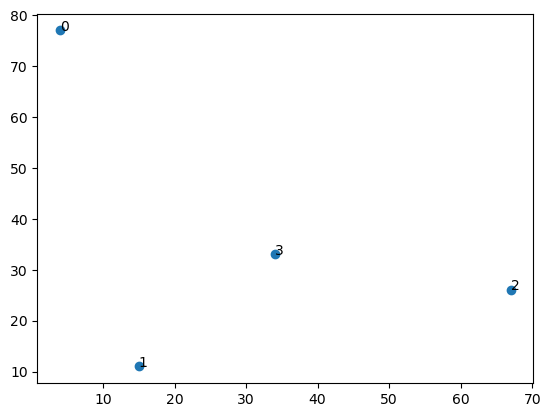

In [201]:
n=4
p=createrandomp(n)
plot(p)

In [264]:
couples=[(i,j) for i in range(n) for j in range(i+1,n)]
#distances=[dist(p,i,j) for i in range(n) for j in range(i+1,n)]
N=len(couples)#n*(n-1)/2
symbols_dict=createvars(N)
locals().update(symbols_dict)
vars=list(symbols_dict.values())
err=0.001
xcouple=dict((vars[var],couples[var]) for var in range (len(vars)))
for var in range (len(vars)):
    print(couples[var],vars[var])
xcouple

(0, 1) x0
(0, 2) x1
(0, 3) x2
(1, 2) x3
(1, 3) x4
(2, 3) x5


{x0: (0, 1), x1: (0, 2), x2: (0, 3), x3: (1, 2), x4: (1, 3), x5: (2, 3)}

In [265]:
def power21(f):
    test=True
    while test:
        test=False
        for i in vars:
            f1= f.subs(i**2, i)
            if f1!=f:
                test==True
                f=f1

    return f     

In [266]:
def obj(p,vars):
    objfunction= 0
    for i in range (len(vars)):
        objfunction+= vars[i]*dist(p,*couples[i])
    return objfunction

In [267]:
obj(p,vars)

66.9103878332804*x0 + 81.0555365166378*x1 + 53.2541078227774*x2 + 54.1202365109392*x3 + 29.0688837074973*x4 + 33.734255586866*x5

In [268]:
def sumpointcond(couples,vars,k):
#cond of the k th point
    kcond=0
    for i in range (len(couples)):
        if k in couples[i]:
            kcond+=vars[i]
    return kcond

In [269]:
sumpointcond(couples,vars,1)

x0 + x3 + x4

In [270]:
def fullsumpointcond(couples,vars):
    conds= []
    for i in range (n):
        conds.append(sumpointcond(couples,vars,i))
    return conds
        

In [271]:
f=fullsumpointcond(couples,vars)#the  0 cond looks shorter but they all have the same numbers of xs
f

[x0 + x1 + x2, x0 + x3 + x4, x1 + x3 + x5, x2 + x4 + x5]

In [272]:
general1=sum(vars)/n
general1

x0/4 + x1/4 + x2/4 + x3/4 + x4/4 + x5/4

In [273]:
error=0.01
#f1 = fullgeneral1multiplication(f[0],general1,error)


In [274]:
f1

e + w + x + y + z

In [275]:
def fullpointmultcond(f):#f is the rresult of fullsumpointcond(couples,vars) and returns the xi*xj*xk cond
    l=[]
    for cond in f:
        listofvars=cond.args
        for i in range(len(listofvars)):
            for j in range(i+1,len(listofvars)):
                for k in range(j+1,len(listofvars)):
                    l.append(listofvars[i]*listofvars[j]*listofvars[k])
    return l

In [276]:
#fullpointmultcond(f)

In [277]:
def intersectioncond():
    prohibited=[]
    for i in range (len(p)):
            for j in range (len(p)):
                if j!=i:
                    for k in range(len(p)):
                        for l in range(len(p)):
                            if k!=l:
                                #print(i,j,k,l)
                                if len(set((i,j,k,l)))>2:
                                    if intersect(p,i,j,k,l):
                                        #print('done')
                                        prohibited.append(vars[couples.index((min(i,j),max(i,j)))]*vars[couples.index((min(k,l),max(k,l)))])
                                        prohibited=list(set(prohibited))
    higherdimprohibited=[]
    for i in prohibited:
        for j in vars:
            if not ( j in i.args):
                higherdimprohibited.append(i*j)
    return higherdimprohibited


In [278]:
higherdimprohibited=intersectioncond()

In [279]:
higherdimprohibited

[x0*x3*x5,
 x1*x3*x5,
 x2*x3*x5,
 x3*x4*x5,
 x0*x2*x5,
 x1*x2*x5,
 x2*x3*x5,
 x2*x4*x5,
 x0*x1*x2,
 x0*x2*x3,
 x0*x2*x4,
 x0*x2*x5,
 x0*x1*x5,
 x1*x2*x5,
 x1*x3*x5,
 x1*x4*x5,
 x0*x1*x4,
 x0*x2*x4,
 x0*x3*x4,
 x0*x4*x5,
 x0*x1*x2,
 x1*x2*x3,
 x1*x2*x4,
 x1*x2*x5,
 x0*x1*x3,
 x0*x2*x3,
 x0*x3*x4,
 x0*x3*x5,
 x0*x3*x4,
 x1*x3*x4,
 x2*x3*x4,
 x3*x4*x5,
 x0*x4*x5,
 x1*x4*x5,
 x2*x4*x5,
 x3*x4*x5,
 x0*x1*x3,
 x1*x2*x3,
 x1*x3*x4,
 x1*x3*x5,
 x0*x1*x2,
 x0*x1*x3,
 x0*x1*x4,
 x0*x1*x5,
 x0*x2*x4,
 x1*x2*x4,
 x2*x3*x4,
 x2*x4*x5]

In [280]:
def fullcond():
    print("******************************************************************")
    c=fullsumpointcond(couples,vars)
    c1=set(fullpointmultcond(c))
    c=set(c)
    c0=set()
    #c=list(c)
    for i in c:
        #print('cond', i)
        c0.add(i/2)
    c=list(c0)
    c0=set()
    for i in range (len(c)):
        
            
        c0.add(fullgeneral1multiplication(c[i],general1,err)-1)
            
        
        
        
    c=c0
    c0=set()
    #for i in c:
        #print('cond', i)
        #c0.add(fullgeneral1multiplication(i,general1,err)-1)
        #c0.add(fullgeneral2multiplication(i,general1,err)-1)
    '''for i in range(len(c)):
        for j in range (len(c)):
            if i!=j:
                print('cond', i, 'is', c[i])
                print('multiplied by cond', j, 'is', c[j])
                c0.add(zigzagmult(c[i],c[j],err)-1)'''
    
                   
    
    c2=set(intersectioncond())
    print("******************************************************************")
    print(c0)
    c=c.union(c1)
    c=c.union(c2)
    #c.add(w1-1)
    c.add(fullgeneral1multiplication(general1,general1,err)-1)
    #c=c2
    return c

In [281]:
conds=fullcond()

******************************************************************
inf x0*x1/8 + x0*x2/8 + x0*x3/4 + x0*x4/4 + x0*x5/8 + x0/8 + x1*x3/8 + x1*x4/8 + x2*x3/8 + x2*x4/8 + x3*x4/4 + x3*x5/8 + x3/8 + x4*x5/8 + x4/8
sup 0
1/8 0.001
1/8 0.001
1/8 0.001
1/4 0.001
1/4 0.001
1/4 0.001
1/8 0.001
1/8 0.001
1/8 0.001
1/8 0.001
1/8 0.001
1/8 0.001
1/8 0.001
1/8 0.001
1/8 0.001
res 0
inf 3*x0*x1/32 + 3*x0*x2/32 + 3*x0*x3/16 + 3*x0*x4/16 + 3*x0*x5/32 + x0/32 + 3*x1*x3/32 + 3*x1*x4/32 + 3*x2*x3/32 + 3*x2*x4/32 + 3*x3*x4/16 + 3*x3*x5/32 + x3/32 + 3*x4*x5/32 + x4/32
sup x0*x1*x2/16 + x0*x1*x3/8 + x0*x1*x4/8 + x0*x1*x5/16 + x0*x2*x3/8 + x0*x2*x4/8 + x0*x2*x5/16 + 3*x0*x3*x4/16 + x0*x3*x5/8 + x0*x4*x5/8 + x1*x2*x3/16 + x1*x2*x4/16 + x1*x3*x4/8 + x1*x3*x5/16 + x1*x4*x5/16 + x2*x3*x4/8 + x2*x3*x5/16 + x2*x4*x5/16 + x3*x4*x5/8
1/32 0.001
1/32 0.001
1/32 0.001
3/16 0.001
3/16 0.001
3/16 0.001
3/32 0.001
3/32 0.001
3/32 0.001
3/32 0.001
3/32 0.001
3/32 0.001
3/32 0.001
3/32 0.001
3/32 0.001
res x0*x1*x2/16 + x0

In [282]:
conds

{32643*x0*x1*x2/65536 + 21731*x0*x1*x3/65536 + 21731*x0*x1*x4/65536 + 21731*x0*x1*x5/65536 + 21731*x0*x2*x3/65536 + 21731*x0*x2*x4/65536 + 21731*x0*x2*x5/65536 + 5425*x0*x3*x4/32768 + 5425*x0*x3*x5/32768 + 5425*x0*x4*x5/32768 + 21731*x1*x2*x3/65536 + 21731*x1*x2*x4/65536 + 21731*x1*x2*x5/65536 + 5425*x1*x3*x4/32768 + 5425*x1*x3*x5/32768 + 5425*x1*x4*x5/32768 + 5425*x2*x3*x4/32768 + 5425*x2*x3*x5/32768 + 5425*x2*x4*x5/32768 - 1,
 5425*x0*x1*x2/32768 + 21731*x0*x1*x3/65536 + 21731*x0*x1*x4/65536 + 5425*x0*x1*x5/32768 + 21731*x0*x2*x3/65536 + 21731*x0*x2*x4/65536 + 5425*x0*x2*x5/32768 + 32643*x0*x3*x4/65536 + 21731*x0*x3*x5/65536 + 21731*x0*x4*x5/65536 + 5425*x1*x2*x3/32768 + 5425*x1*x2*x4/32768 + 21731*x1*x3*x4/65536 + 5425*x1*x3*x5/32768 + 5425*x1*x4*x5/32768 + 21731*x2*x3*x4/65536 + 5425*x2*x3*x5/32768 + 5425*x2*x4*x5/32768 + 21731*x3*x4*x5/65536 - 1,
 5425*x0*x1*x2/32768 + 21731*x0*x1*x3/65536 + 5425*x0*x1*x4/32768 + 21731*x0*x1*x5/65536 + 5425*x0*x2*x3/32768 + 5425*x0*x2*x5/32768 + 5

In [283]:
def highdimobj():
    j= obj(p,vars)
    j=power21(expand(j**2))
    J= fullgeneral1multiplication(j,general1,err)
    return J
    

In [284]:
a = dict(('a%d'%k, symbols('a%d'%k)) for k in range(len(conds)))
locals().update(a)
avalues=list(a.values())
J=highdimobj()


inf 8185.20738436286*x0*x1 + 5391.50300813737*x0*x2 + 5472.70601457581*x0*x3 + 3275.51028274917*x0*x4 + 3660.92212458421*x0*x5 + 1119.25*x0 + 6668.0402812901*x1*x2 + 6761.49480680151*x1*x3 + 4209.94396485094*x1*x4 + 4661.34818558281*x1*x5 + 1642.5*x1 + 4323.37491054777*x2*x3 + 2468.28746724684*x2*x4 + 2789.98768434409*x2*x5 + 709.0*x2 + 2516.71486135874*x3*x4 + 2842.45589088166*x3*x5 + 732.25*x3 + 1476.3671526136*x4*x5 + 211.25*x4 + 284.5*x5
sup 6651.62533689516*x0*x1*x2 + 6715.70410287008*x0*x1*x3 + 4862.33081598148*x0*x1*x4 + 5207.48884726494*x0*x1*x5 + 5033.29196663047*x0*x2*x3 + 3528.15037906669*x0*x2*x4 + 3808.45640853283*x0*x2*x5 + 3569.71557934186*x0*x3*x4 + 3852.04201502084*x0*x3*x5 + 2591.39977997349*x0*x4*x5 + 5792.70499931969*x1*x2*x3 + 4110.38585669394*x1*x2*x4 + 4423.6880756085*x1*x2*x5 + 4158.07681650559*x1*x3*x4 + 4473.39944163299*x1*x3*x5 + 3035.57965152367*x1*x4*x5 + 3001.68861957667*x2*x3*x4 + 3252.15924288676*x2*x3*x5 + 2162.57115210226*x2*x4*x5 + 2189.768952427*x3*x

In [285]:
J

17930.9158703675*x0*x1*x2 + 18090.0733852245*x0*x1*x3 + 13688.6601818216*x0*x1*x4 + 14476.6430306071*x0*x1*x5 + 13480.5821758969*x0*x2*x3 + 9775.63239996058*x0*x2*x4 + 10433.9112292935*x0*x2*x5 + 9889.76277835351*x0*x3*x4 + 10552.0824196304*x0*x3*x5 + 7336.13139893588*x0*x4*x5 + 15697.0751921015*x1*x2*x3 + 11637.7700549263*x1*x2*x4 + 12362.0412592226*x1*x2*x5 + 11764.1519551394*x1*x3*x4 + 12492.4639713796*x1*x3*x5 + 8922.15758944632*x1*x4*x5 + 8206.70868602411*x2*x3*x4 + 8805.3166828118*x2*x3*x5 + 5931.47372834505*x2*x4*x5 + 6016.86930403804*x3*x4*x5

In [286]:
dim3vars=[]
for i in range( len(vars)):
    for j in range (i+1,len(vars)):
        for  k in range(j+1,len(vars)):
            dim3vars.append(vars[i]*vars[j]*vars[k])

w = dict(('w%d'%k, symbols('w%d'%k)) for k in range(len(dim3vars)))
locals().update(w)
wvars=list(w.values())
dim3vars

[x0*x1*x2,
 x0*x1*x3,
 x0*x1*x4,
 x0*x1*x5,
 x0*x2*x3,
 x0*x2*x4,
 x0*x2*x5,
 x0*x3*x4,
 x0*x3*x5,
 x0*x4*x5,
 x1*x2*x3,
 x1*x2*x4,
 x1*x2*x5,
 x1*x3*x4,
 x1*x3*x5,
 x1*x4*x5,
 x2*x3*x4,
 x2*x3*x5,
 x2*x4*x5,
 x3*x4*x5]

In [287]:
k=0
for i in range (len(wvars)):
    J= J.subs(dim3vars[i],wvars[i])
    print(i,'/',len(wvars))
    k+=1


0 / 20
1 / 20
2 / 20
3 / 20
4 / 20
5 / 20
6 / 20
7 / 20
8 / 20
9 / 20
10 / 20
11 / 20
12 / 20
13 / 20
14 / 20
15 / 20
16 / 20
17 / 20
18 / 20
19 / 20


In [288]:
J=expand(J**2)

In [289]:
print(J)
#to eleminate the squares
test=True
while test:
    test=False
    for i in wvars:
        print(i)
        J1= J.subs(i**2, i)
        if J1!=J:
            test==True
            J=J1
    print(J)

321517743.950199*w0**2 + 648743167.918471*w0*w1 + 562925869.360811*w0*w10 + 417351751.547134*w0*w11 + 443325443.610267*w0*w12 + 421884037.987649*w0*w13 + 448002640.968812*w0*w14 + 319964914.237046*w0*w15 + 294307606.043426*w0*w16 + 315774785.302884*w0*w17 + 212713512.820501*w0*w18 + 215775954.587406*w0*w19 + 490900428.196586*w0*w2 + 519158936.534315*w0*w3 + 483438369.759167*w0*w4 + 350572084.286665*w0*w5 + 374179168.90269*w0*w6 + 354665008.713098*w0*w7 + 378417004.247153*w0*w8 + 263087109.856562*w0*w9 + 327250755.082808*w1**2 + 567922484.317006*w1*w10 + 421056228.667971*w1*w11 + 447260467.141021*w1*w12 + 425628744.366808*w1*w13 + 451979180.009061*w1*w14 + 322804971.095243*w1*w15 + 296919924.762671*w1*w16 + 318577649.944414*w1*w17 + 214601590.056586*w1*w18 + 217691214.518705*w1*w19 + 495257734.469106*w1*w2 + 523767069.590761*w1*w3 + 487729441.675049*w1*w4 + 353683815.00453*w1*w5 + 377500439.665674*w1*w6 + 357813068.845753*w1*w7 + 381775890.676102*w1*w8 + 265422310.7408*w1*w9 + 246398169

In [290]:
J

648743167.918471*w0*w1 + 562925869.360811*w0*w10 + 417351751.547134*w0*w11 + 443325443.610267*w0*w12 + 421884037.987649*w0*w13 + 448002640.968812*w0*w14 + 319964914.237046*w0*w15 + 294307606.043426*w0*w16 + 315774785.302884*w0*w17 + 212713512.820501*w0*w18 + 215775954.587406*w0*w19 + 490900428.196586*w0*w2 + 519158936.534315*w0*w3 + 483438369.759167*w0*w4 + 350572084.286665*w0*w5 + 374179168.90269*w0*w6 + 354665008.713098*w0*w7 + 378417004.247153*w0*w8 + 263087109.856562*w0*w9 + 321517743.950199*w0 + 567922484.317006*w1*w10 + 421056228.667971*w1*w11 + 447260467.141021*w1*w12 + 425628744.366808*w1*w13 + 451979180.009061*w1*w14 + 322804971.095243*w1*w15 + 296919924.762671*w1*w16 + 318577649.944414*w1*w17 + 214601590.056586*w1*w18 + 217691214.518705*w1*w19 + 495257734.469106*w1*w2 + 523767069.590761*w1*w3 + 487729441.675049*w1*w4 + 353683815.00453*w1*w5 + 377500439.665674*w1*w6 + 357813068.845753*w1*w7 + 381775890.676102*w1*w8 + 265422310.7408*w1*w9 + 327250755.082808*w1 + 365357903.24113

In [291]:
def lagrangian(j):
    L=0
    #conds=fullcond()
    c=list(conds)
    L=J
    for i in range(len(conds)):
        L+=c[i]*avalues[i]
    return L

l=lagrangian(J)

In [292]:
l=l.evalf()
l

a0*x3*x4*x5 + a1*x1*x2*x5 + a10*x1*x2*x3 + a11*x1*x4*x5 + a12*x2*x4*x5 + a13*x0*x3*x4 + a14*x0*x2*x3 + a15*(0.165557861328125*x0*x1*x2 + 0.165557861328125*x0*x1*x4 + 0.165557861328125*x0*x1*x5 + 0.165557861328125*x0*x2*x3 + 0.331588745117188*x0*x2*x4 + 0.331588745117188*x0*x2*x5 + 0.165557861328125*x0*x3*x4 + 0.165557861328125*x0*x3*x5 + 0.331588745117188*x0*x4*x5 + 0.165557861328125*x1*x2*x3 + 0.331588745117188*x1*x2*x4 + 0.331588745117188*x1*x2*x5 + 0.165557861328125*x1*x3*x4 + 0.165557861328125*x1*x3*x5 + 0.331588745117188*x1*x4*x5 + 0.331588745117188*x2*x3*x4 + 0.331588745117188*x2*x3*x5 + 0.498092651367188*x2*x4*x5 + 0.331588745117188*x3*x4*x5 - 1.0) + a16*x0*x3*x5 + a17*(0.165557861328125*x0*x1*x2 + 0.331588745117188*x0*x1*x3 + 0.331588745117188*x0*x1*x4 + 0.165557861328125*x0*x1*x5 + 0.331588745117188*x0*x2*x3 + 0.331588745117188*x0*x2*x4 + 0.165557861328125*x0*x2*x5 + 0.498092651367188*x0*x3*x4 + 0.331588745117188*x0*x3*x5 + 0.331588745117188*x0*x4*x5 + 0.165557861328125*x1*x2*

In [293]:
for i in range (len(wvars)):
    print(wvars[i],dim3vars[i])
len(l.args)

w0 x0*x1*x2
w1 x0*x1*x3
w2 x0*x1*x4
w3 x0*x1*x5
w4 x0*x2*x3
w5 x0*x2*x4
w6 x0*x2*x5
w7 x0*x3*x4
w8 x0*x3*x5
w9 x0*x4*x5
w10 x1*x2*x3
w11 x1*x2*x4
w12 x1*x2*x5
w13 x1*x3*x4
w14 x1*x3*x5
w15 x1*x4*x5
w16 x2*x3*x4
w17 x2*x3*x5
w18 x2*x4*x5
w19 x3*x4*x5


235

In [294]:
#for i in range (len(wvars)):
def changevars(l):
    
    k=0
    for i in range (len(wvars))    :
        l= l.subs(dim3vars[i],wvars[i])
        print(i,'/',len(wvars))
        k+=1
            
  
    return l


In [295]:
l=changevars(l)

0 / 20
1 / 20
2 / 20
3 / 20
4 / 20
5 / 20
6 / 20
7 / 20
8 / 20
9 / 20
10 / 20
11 / 20
12 / 20
13 / 20
14 / 20
15 / 20
16 / 20
17 / 20
18 / 20
19 / 20


In [296]:
l=expand(l)
#collect(l, avalues)
l

a0*w19 + a1*w12 + a10*w10 + a11*w15 + a12*w18 + a13*w7 + a14*w4 + 0.165557861328125*a15*w0 + 0.165557861328125*a15*w10 + 0.331588745117188*a15*w11 + 0.331588745117188*a15*w12 + 0.165557861328125*a15*w13 + 0.165557861328125*a15*w14 + 0.331588745117188*a15*w15 + 0.331588745117188*a15*w16 + 0.331588745117188*a15*w17 + 0.498092651367188*a15*w18 + 0.331588745117188*a15*w19 + 0.165557861328125*a15*w2 + 0.165557861328125*a15*w3 + 0.165557861328125*a15*w4 + 0.331588745117188*a15*w5 + 0.331588745117188*a15*w6 + 0.165557861328125*a15*w7 + 0.165557861328125*a15*w8 + 0.331588745117188*a15*w9 - 1.0*a15 + a16*w8 + 0.165557861328125*a17*w0 + 0.331588745117188*a17*w1 + 0.165557861328125*a17*w10 + 0.165557861328125*a17*w11 + 0.331588745117188*a17*w13 + 0.165557861328125*a17*w14 + 0.165557861328125*a17*w15 + 0.331588745117188*a17*w16 + 0.165557861328125*a17*w17 + 0.165557861328125*a17*w18 + 0.331588745117188*a17*w19 + 0.331588745117188*a17*w2 + 0.165557861328125*a17*w3 + 0.331588745117188*a17*w4 + 0.331

In [297]:
collect(l, wvars)

-1.0*a15 - 1.0*a17 - 1.0*a22 - 1.0*a4 - 1.0*a6 + w0*(0.165557861328125*a15 + 0.165557861328125*a17 + 0.165557861328125*a22 + a3 + 0.498092651367188*a4 + 0.247650146484375*a6 + 648743167.918471*w1 + 562925869.360811*w10 + 417351751.547134*w11 + 443325443.610267*w12 + 421884037.987649*w13 + 448002640.968812*w14 + 319964914.237046*w15 + 294307606.043426*w16 + 315774785.302884*w17 + 212713512.820501*w18 + 215775954.587406*w19 + 490900428.196586*w2 + 519158936.534315*w3 + 483438369.759167*w4 + 350572084.286665*w5 + 374179168.90269*w6 + 354665008.713098*w7 + 378417004.247153*w8 + 263087109.856562*w9 + 321517743.950199) + w1*(0.331588745117188*a17 + 0.331588745117188*a22 + 0.331588745117188*a4 + 0.247650146484375*a6 + a8 + 567922484.317006*w10 + 421056228.667971*w11 + 447260467.141021*w12 + 425628744.366808*w13 + 451979180.009061*w14 + 322804971.095243*w15 + 296919924.762671*w16 + 318577649.944414*w17 + 214601590.056586*w18 + 217691214.518705*w19 + 495257734.469106*w2 + 523767069.590761*w3 + 

In [298]:
avars=[]
system=[]
forbid=[]
for w in wvars:
    print(w,type(D(l,w))==sympy.core.numbers.Float)
    d=D(l,w)
    d=sympify(d)
    symbol = d.free_symbols
    if not symbol:
        forbid.append(w)
        print(w)
a = dict(('a%d'%k, symbols('a%d'%k)) for k in range(len(avalues),len(avalues)+len(forbid)))
locals().update(a)
anew=list(a.values())  
avalues.extend(anew)
for i in range(len(anew)):
    l+=anew[i]*forbid[i]
for w in wvars:
    print(type(D(l,w))==sympy.core.numbers.Float)
    d=D(l,w)
    system.append(D(l,w))

for i in avalues:
    if D(l,i)!=0:
        system.append(D(l,i))
        avars.append(i)
avars


    

w0 False
w1 False
w2 False
w3 False
w4 False
w5 False
w6 False
w7 False
w8 False
w9 False
w10 False
w11 False
w12 False
w13 False
w14 False
w15 False
w16 False
w17 False
w18 False
w19 False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


[a0,
 a1,
 a2,
 a3,
 a4,
 a5,
 a6,
 a7,
 a8,
 a9,
 a10,
 a11,
 a12,
 a13,
 a14,
 a15,
 a16,
 a17,
 a18,
 a19,
 a20,
 a21,
 a22,
 a23,
 a24]

In [299]:
forbid

[]

In [300]:
system

[0.165557861328125*a15 + 0.165557861328125*a17 + 0.165557861328125*a22 + a3 + 0.498092651367188*a4 + 0.247650146484375*a6 + 648743167.918471*w1 + 562925869.360811*w10 + 417351751.547134*w11 + 443325443.610267*w12 + 421884037.987649*w13 + 448002640.968812*w14 + 319964914.237046*w15 + 294307606.043426*w16 + 315774785.302884*w17 + 212713512.820501*w18 + 215775954.587406*w19 + 490900428.196586*w2 + 519158936.534315*w3 + 483438369.759167*w4 + 350572084.286665*w5 + 374179168.90269*w6 + 354665008.713098*w7 + 378417004.247153*w8 + 263087109.856562*w9 + 321517743.950199,
 0.331588745117188*a17 + 0.331588745117188*a22 + 0.331588745117188*a4 + 0.247650146484375*a6 + a8 + 648743167.918471*w0 + 567922484.317006*w10 + 421056228.667971*w11 + 447260467.141021*w12 + 425628744.366808*w13 + 451979180.009061*w14 + 322804971.095243*w15 + 296919924.762671*w16 + 318577649.944414*w17 + 214601590.056586*w18 + 217691214.518705*w19 + 495257734.469106*w2 + 523767069.590761*w3 + 487729441.675049*w4 + 353683815.004

In [301]:
res=list(linsolve(system,wvars+avalues))[0]
for i in range(len(wvars)):
    print(wvars[i],"=",dim3vars[i],"=", res[i])
xcouple

w0 = x0*x1*x2 = 3.40224132442497
w1 = x0*x1*x3 = 0.0241131367558882
w2 = x0*x1*x4 = 7.72498324519537
w3 = x0*x1*x5 = 3.83946186025736
w4 = x0*x2*x3 = -3.12551609649911
w5 = x0*x2*x4 = -6.47194857992254
w6 = x0*x2*x5 = -0.753593113757725
w7 = x0*x3*x4 = -4.33614999069633
w8 = x0*x3*x5 = 11.2170883628512
w9 = x0*x4*x5 = -14.9240943949359
w10 = x1*x2*x3 = 0.0482262735117766
w11 = x1*x2*x4 = -2.07581802826230
w12 = x1*x2*x5 = 2.77183062342322
w13 = x1*x3*x4 = 10.7692352507929
w14 = x1*x3*x5 = 0
w15 = x1*x4*x5 = -5.74299620885776
w16 = x2*x3*x4 = 0
w17 = x2*x3*x5 = 9.08326519416661
w18 = x2*x4*x5 = -0.316500527773305
w19 = x3*x4*x5 = 2.53879860079058


{x0: (0, 1), x1: (0, 2), x2: (0, 3), x3: (1, 2), x4: (1, 3), x5: (2, 3)}

In [ ]:
A, b = linear_eq_to_matrix(system,wvars+avalues )

In [109]:
import pickle


with open('example.pickle', 'wb') as f:
    pickle.dump(A, f)

NameError: name 'A' is not defined

In [ ]:
A=np.array(A,dtype='float64')

In [ ]:
A

In [ ]:
import pickle


with open('example.pickle', 'wb') as f:
    pickle.dump(A, f)

In [ ]:
np.linalg.det(A)


In [ ]:
import pandas as pd
df=pd.DataFrame(A)
datatoexcel = pd.ExcelWriter('CarsData1.xlsx')
  
# write DataFrame to excel
df.to_excel(datatoexcel)
  
# save the excel
datatoexcel.save()


In [ ]:
df

In [ ]:
avalues

In [ ]:
c=set(fullsumpointcond(couples,vars))
c0=set()
for i in c:
    print('cond', i)
    c0.add(fullgeneral1multiplication(i,general1,err)-2)
c1=set(fullpointmultcond(c))
c2=set(intersectioncond())
c=c0.union(c1)
c=c.union(c2)

# another method

In [365]:
dim3vars=[]
for i in range( len(vars)):
    for j in range (len(vars)):
        for  k in range(len(vars)):
            dim3vars.append(vars[i]*vars[j]*vars[k])
dim3vars=list(set(dim3vars))
w = dict(('w%d'%k, symbols('w%d'%k)) for k in range(len(dim3vars)))
locals().update(w)
wvars=list(w.values())
for i in range (len(wvars)):
    print(dim3vars[i], wvars[i])


x0**2*x2 w0
x1*x2*x5 w1
x0*x1*x2 w2
x2**3 w3
x0*x1**2 w4
x4*x5**2 w5
x0**2*x4 w6
x1*x2*x3 w7
x3**3 w8
x1*x4*x5 w9
x0*x4**2 w10
x0*x3**2 w11
x1**2*x5 w12
x4**3 w13
x1*x2**2 w14
x1**2*x3 w15
x1**2*x2 w16
x4**2*x5 w17
x3**2*x5 w18
x0*x1*x4 w19
x1*x5**2 w20
x2*x3*x4 w21
x3*x4**2 w22
x1**2*x4 w23
x0*x2**2 w24
x0*x1*x5 w25
x0**2*x1 w26
x2*x3*x5 w27
x2*x3**2 w28
x2*x4**2 w29
x3*x4*x5 w30
x0*x2*x4 w31
x0*x1*x3 w32
x3**2*x4 w33
x0*x2*x5 w34
x0*x5**2 w35
x2**2*x5 w36
x2**2*x3 w37
x0*x3*x4 w38
x2*x4*x5 w39
x0*x2*x3 w40
x0*x3*x5 w41
x2**2*x4 w42
x1**3 w43
x3*x5**2 w44
x1*x3*x5 w45
x2*x5**2 w46
x0**3 w47
x0**2*x5 w48
x0*x4*x5 w49
x1*x3*x4 w50
x5**3 w51
x1*x2*x4 w52
x0**2*x3 w53
x1*x4**2 w54
x1*x3**2 w55


In [366]:
J=obj(p,vars)
J

66.9103878332804*x0 + 81.0555365166378*x1 + 53.2541078227774*x2 + 54.1202365109392*x3 + 29.0688837074973*x4 + 33.734255586866*x5

In [367]:
J=J*(general1**2)
J=expand(J)
J

4.18189923958003*x0**3 + 13.4297695114499*x0**2*x1 + 11.6921802180836*x0**2*x2 + 11.7463132610938*x0**2*x3 + 10.1806037108786*x0**2*x4 + 10.4721894533392*x0**2*x5 + 14.3138413041597*x0*x1**2 + 25.1525040215869*x0*x1*x2 + 25.2607701076072*x0*x1*x3 + 22.1293510071769*x0*x1*x4 + 22.712522492098*x0*x1*x5 + 10.8386627174272*x0*x2**2 + 21.7855915208746*x0*x2*x3 + 18.6541724204444*x0*x2*x4 + 19.2373439053655*x0*x2*x5 + 10.9469288034474*x0*x3**2 + 18.7624385064646*x0*x3*x4 + 19.3456099913857*x0*x3*x5 + 7.81550970301718*x0*x4**2 + 16.2141908909555*x0*x4*x5 + 8.39868118793828*x0*x5**2 + 5.06597103228986*x1**3 + 13.4603238035033*x1**2*x2 + 13.5144568465134*x1**2*x3 + 11.9487472962983*x1**2*x4 + 12.2403330387588*x1**2*x5 + 11.722734510137*x1*x2**2 + 23.5537351062943*x1*x2*x3 + 20.4223160058641*x1*x2*x4 + 21.0054874907851*x1*x2*x5 + 11.8310005961573*x1*x3**2 + 20.5305820918843*x1*x3*x4 + 21.1137535768054*x1*x3*x5 + 8.69958149572702*x1*x4**2 + 17.9823344763751*x1*x4*x5 + 9.28275298064811*x1*x5**2 + 

In [368]:
def A(k,n):
    return factorial(n)/factorial(n-k)
def fullcond():
    print("******************************************************************")
    c=fullsumpointcond(couples,vars)
    c3=set()
    for i in c:
        k=0
        for j in i.args:
            k+=j**3
        c3.add(k-2)
        
        
        
    c4=set()
    for i in range (len(vars)):
        for j in range (i+1,len(vars)):
            c4.add((vars[i]**2) *vars[j]-(vars[j]**2) *vars[i] )
    c5=set()  
    for i in range(len(vars)):
        res=0
        for j in range(  len(vars)):
            for k in range(  len(vars)):
                res+=vars[i]*vars[j]*vars[k]
        res-=(vars[i]**3)*A(2,n)
        c5.add(res)
                
                
    
    c1=set(fullpointmultcond(c))
    c0=set()
    for i in c:
        c0.add((i/2)**3 -1)

    
     
#     #c=list(c)
#     for i in c:
#         #print('cond', i)
#         c0.add(i/2)
#     c=list(c0)
#     c0=set()
#     for i in range (len(c)):
        
            
#         c0.add(fullgeneral1multiplication(c[i],general1,err)-1)
            
        
        
        
#     c=c0
#     c0=set()
    #for i in c:
        #print('cond', i)
        #c0.add(fullgeneral1multiplication(i,general1,err)-1)
        #c0.add(fullgeneral2multiplication(i,general1,err)-1)
    '''for i in range(len(c)):
        for j in range (len(c)):
            if i!=j:
                print('cond', i, 'is', c[i])
                print('multiplied by cond', j, 'is', c[j])
                c0.add(zigzagmult(c[i],c[j],err)-1)'''
    
                   
    
    c2=set(intersectioncond())
    print("******************************************************************")
    print(c0)
    c=set(c)
    c=c.union(c1)
    c=c.union(c2)
    #c.add(w1-1)
    c.add(fullgeneral1multiplication(general1,general1,err)-1)
    c=c.union(c3)
    c=c.union(c4)
    c=c.union(c5)
    #c=c2
    return c

In [369]:
conds=fullcond()

******************************************************************
******************************************************************
{(x1/2 + x3/2 + x5/2)**3 - 1, (x0/2 + x3/2 + x4/2)**3 - 1, (x2/2 + x4/2 + x5/2)**3 - 1, (x0/2 + x1/2 + x2/2)**3 - 1}
inf x0*x1/8 + x0*x2/8 + x0*x3/8 + x0*x4/8 + x0*x5/8 + x0/16 + x1*x2/8 + x1*x3/8 + x1*x4/8 + x1*x5/8 + x1/16 + x2*x3/8 + x2*x4/8 + x2*x5/8 + x2/16 + x3*x4/8 + x3*x5/8 + x3/16 + x4*x5/8 + x4/16 + x5/16
sup 0
1/16 0.001
1/16 0.001
1/16 0.001
1/16 0.001
1/16 0.001
1/16 0.001
1/8 0.001
1/8 0.001
1/8 0.001
1/8 0.001
1/8 0.001
1/8 0.001
1/8 0.001
1/8 0.001
1/8 0.001
1/8 0.001
1/8 0.001
1/8 0.001
1/8 0.001
1/8 0.001
1/8 0.001
res 0
inf 3*x0*x1/32 + 3*x0*x2/32 + 3*x0*x3/32 + 3*x0*x4/32 + 3*x0*x5/32 + x0/64 + 3*x1*x2/32 + 3*x1*x3/32 + 3*x1*x4/32 + 3*x1*x5/32 + x1/64 + 3*x2*x3/32 + 3*x2*x4/32 + 3*x2*x5/32 + x2/64 + 3*x3*x4/32 + 3*x3*x5/32 + x3/64 + 3*x4*x5/32 + x4/64 + x5/64
sup 3*x0*x1*x2/32 + 3*x0*x1*x3/32 + 3*x0*x1*x4/32 + 3*x0*x1*x5/32 + 3*x0*x2*

In [370]:
k=0
for i in range (len(wvars)):
    J= J.subs(dim3vars[i],wvars[i])
    print(i,'/',len(wvars))
    k+=1


0 / 56
1 / 56
2 / 56
3 / 56
4 / 56
5 / 56
6 / 56
7 / 56
8 / 56
9 / 56
10 / 56
11 / 56
12 / 56
13 / 56
14 / 56
15 / 56
16 / 56
17 / 56
18 / 56
19 / 56
20 / 56
21 / 56
22 / 56
23 / 56
24 / 56
25 / 56
26 / 56
27 / 56
28 / 56
29 / 56
30 / 56
31 / 56
32 / 56
33 / 56
34 / 56
35 / 56
36 / 56
37 / 56
38 / 56
39 / 56
40 / 56
41 / 56
42 / 56
43 / 56
44 / 56
45 / 56
46 / 56
47 / 56
48 / 56
49 / 56
50 / 56
51 / 56
52 / 56
53 / 56
54 / 56
55 / 56


In [371]:
J=J**2

In [372]:
a = dict(('a%d'%k, symbols('a%d'%k)) for k in range(len(conds)))
locals().update(a)
avalues=list(a.values())
def lagrangian(j):
    L=0
    #conds=fullcond()
    c=list(conds)
    L=J
    for i in range(len(conds)):
        L+=c[i]*avalues[i]
    return L

l=lagrangian(J)

In [373]:
l=changevars(l)

0 / 56
1 / 56
2 / 56
3 / 56
4 / 56
5 / 56
6 / 56
7 / 56
8 / 56
9 / 56
10 / 56
11 / 56
12 / 56
13 / 56
14 / 56
15 / 56
16 / 56
17 / 56
18 / 56
19 / 56
20 / 56
21 / 56
22 / 56
23 / 56
24 / 56
25 / 56
26 / 56
27 / 56
28 / 56
29 / 56
30 / 56
31 / 56
32 / 56
33 / 56
34 / 56
35 / 56
36 / 56
37 / 56
38 / 56
39 / 56
40 / 56
41 / 56
42 / 56
43 / 56
44 / 56
45 / 56
46 / 56
47 / 56
48 / 56
49 / 56
50 / 56
51 / 56
52 / 56
53 / 56
54 / 56
55 / 56


In [374]:
l=expand(l)

In [375]:
avars=[]
system=[]
forbid=[]
for w in wvars:
    print(w,type(D(l,w))==sympy.core.numbers.Float)
    d=D(l,w)
    d=sympify(d)
    symbol = d.free_symbols
    if not symbol:
        forbid.append(w)
        print(w)
a = dict(('a%d'%k, symbols('a%d'%k)) for k in range(len(avalues),len(avalues)+len(forbid)))
locals().update(a)
anew=list(a.values())  
avalues.extend(anew)
for i in range(len(anew)):
    l+=anew[i]*forbid[i]
for w in wvars:
    print(type(D(l,w))==sympy.core.numbers.Float)
    d=D(l,w)
    system.append(D(l,w))

for i in avalues:
    if D(l,i)!=0:
        system.append(D(l,i))
        avars.append(i)
system


    

w0 False
w1 False
w2 False
w3 False
w4 False
w5 False
w6 False
w7 False
w8 False
w9 False
w10 False
w11 False
w12 False
w13 False
w14 False
w15 False
w16 False
w17 False
w18 False
w19 False
w20 False
w21 False
w22 False
w23 False
w24 False
w25 False
w26 False
w27 False
w28 False
w29 False
w30 False
w31 False
w32 False
w33 False
w34 False
w35 False
w36 False
w37 False
w38 False
w39 False
w40 False
w41 False
w42 False
w43 False
w44 False
w45 False
w46 False
w47 False
w48 False
w49 False
w50 False
w51 False
w52 False
w53 False
w54 False
w55 False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


[a26 + 2*a35 + a44 + 273.414156504293*w0 + 491.199890621923*w1 + 182.760695887716*w10 + 255.986928808876*w11 + 286.232359637064*w12 + 42.4848283808217*w13 + 274.128649082541*w14 + 316.026929997898*w15 + 314.761063408643*w16 + 134.27303124221*w17 + 207.499264163369*w18 + 517.480720170287*w19 + 588.175219912936*w2 + 217.071241539382*w20 + 398.829702948739*w21 + 164.067601603045*w22 + 279.413813537319*w23 + 253.455195630366*w24 + 531.117812369776*w25 + 314.046570830395*w26 + 412.466795148229*w27 + 236.027967934949*w28 + 162.80173501379*w29 + 77.8320782521464*w3 + 341.772295405579*w30 + 436.215891518082*w31 + 590.706953091446*w32 + 200.680718063625*w33 + 449.852983717572*w34 + 196.397788087206*w35 + 204.967530984859*w36 + 234.762101345694*w37 + 438.747624696593*w38 + 339.240562227069*w39 + 334.72002428257*w4 + 509.442124439242*w40 + 452.384716896082*w41 + 198.148984885114*w42 + 118.464492578249*w43 + 177.704693802534*w44 + 493.731623800433*w45 + 176.438827213279*w46 + 97.7910391260732*w47 

In [376]:
res=list(linsolve(system,wvars+avalues))[0]
for i in range(len(wvars)):
    print(wvars[i],"=",dim3vars[i],"=", res[i])
xcouple

IndexError: list index out of range

In [377]:
linsolve(system,wvars+avalues)

EmptySet